In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read in data - Unsure on age categories - so have just named them Age1 through Age7
df=pd.read_csv("MSOAflows.csv", header=None)
df=df.rename(columns={0:"From", 1:"To", 2:"Age1", 3:"Age2",
                  4:"Age3", 5:"Age4", 6:"Age5", 7:"Age6", 8:"Age7"})

In [3]:
lookup=pd.DataFrame({"CD":list(df.To.unique())})
lookup['ID']=(np.arange(8725))+1
lookupdict=dict(zip(lookup.CD, lookup.ID))

In [13]:
df.From=df.From.map(lookupdict)
df.To=df.To.map(lookupdict)
df.to_csv('ageflows.csv', header=None)

In [5]:
df.head()

,From,To,Age1,Age2,Age3,Age4,Age5,Age6,Age7
0,1,1,15,1,6,7,1,0,0
1,1,2,207,42,105,60,0,0,0
2,1,3,3,0,2,1,0,0,0
3,1,4,1,0,0,1,0,0,0
4,1,5,5,1,2,2,0,0,0


## Shapefile merging, read from internet sources. Areas not included in flow data

Outputs geom - full geometry shapefile for total UK countries. Length > dataset - unsure how you want shapefiles coded that aren't in the flow dataset - so have left them enumerated at the bottom, but they just don't have a mapping in the flows data.

In [6]:
EWMSOA=gpd.read_file('https://opendata.arcgis.com/datasets/02aa733fc3414b0ea4179899e499918d_0.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D')

In [7]:
SIZ=gpd.read_file('http://sedsh127.sedsh.gov.uk/Atom_data/ScotGov/ZippedShapefiles/SG_IntermediateZoneBdry_2011.zip')

In [8]:
NISOA=gpd.read_file('https://www.nisra.gov.uk/sites/nisra.gov.uk/files/publications/SOA2011_Esri_Shapefile_0.zip')

In [9]:
#all files to consistent lat/long projection
EWMSOA=EWMSOA.to_crs("EPSG:4326")
NISOA=NISOA.to_crs("EPSG:4326")
SIZ=SIZ.to_crs("EPSG:4326")

In [10]:
EWMSOA.rename(columns={"msoa11cd":"cd"}, inplace=True)
NISOA.rename(columns={"SOA_CODE":"cd"}, inplace=True)
SIZ.rename(columns={"InterZone":"cd"}, inplace=True)

In [11]:
geom=gpd.GeoDataFrame(EWMSOA[{"cd","geometry"}])
geom=geom.append(NISOA[{"cd","geometry"}], ignore_index=True)
geom=geom.append(SIZ[{"cd","geometry"}], ignore_index=True)
geom.shape

(9370, 2)

In [12]:
geom['ID']=geom.cd.map(lookupdict)
geom=geom.sort_values(by=['ID'])
geom.to_file("fullgeom.shp")

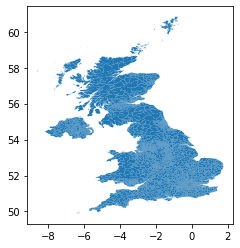

In [14]:
geom.plot()